<h1> Metrics to Evaluate Classification Models  </h1>

### Table of Contents

1. [Data Description](#dd)
2. [Logistic Regression Model](#model)
3. [Evaluation Metrics](#metrics)
     - 3.1 [Accuracy](#acc)
     - 3.2 [Confusion Matrix](#conf)
     - 3.3 [Recall](#recall)
     - 3.4 [Specificity](#specificity)
     - 3.5 [Precision](#precision)
     - 3.6 [F1 Score](#f1) <br> <br>
4. [Logistic Regression with different threshold](#diff)
5. [ROC Curve](#roc)
6. [AUC](#auc)
7. Comparision with AUC of Unbalanced logistic regression 

### 1. Data Description  <a id='dd'>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

** Column Description **
- Pregnancies : It represents the number of times the woman got pregnant during her life.
- Glucose : It represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test.
- Blood Pressure : The blood pressure is a very well-known way to measure the health of the heart of a person, there are too measure in fact, the diastolic and the systolic. In this data set, we have the diastolic which is in the fact the pressure in (mm/Hg) when the heart relaxed after the contraction.
- Skin Thickness : It is a value used to estimate body fat (mm) which is measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.
- Insulin : It represents the rate of insulin 2 hours serum insulin (mu U/ml).
- BMI : It represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person.
- DiabetesPedigreeFunction : It is an indicator of history of diabetes in the family.
- Age : It represents the age in years of the Pima’s woman.
- Outcome : It can take only 2 values (‘0’ or ‘1’) and represents if the patient shows signs of diabetes.

**Objective**  

Predict whether the Pima woman has diabetes or not.

### 2. Logistic Regression Model  <a id='model'>

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
# Loading the dataset

pima = pd.read_csv('attachment_diabetes_lyst8869.csv')

In [3]:
# print the first 5 rows of data
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# The count of occurance of diabetes
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

** Exploratory Data Analysis **

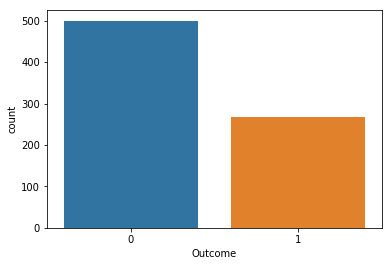

In [6]:
sns.countplot(x='Outcome', data = pima)

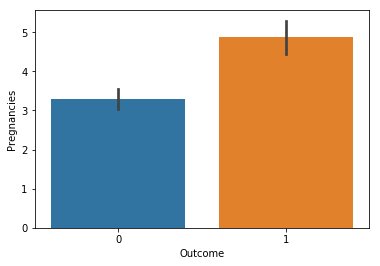

In [8]:
sns.barplot(x='Outcome', y='Pregnancies',data=pima)

People who were diagonised with Diabetes had more pregnancies.

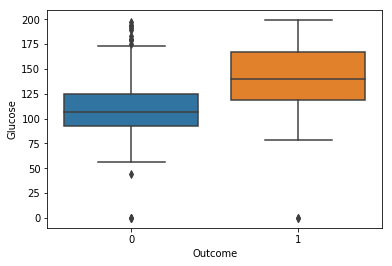

In [9]:
sns.boxplot(x='Outcome',y='Glucose',  data=pima)

People who were diagonised with Diabetes had higher Glucose level.

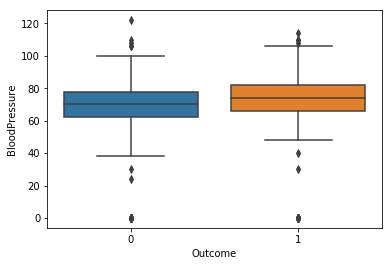

In [11]:
sns.boxplot(x='Outcome',y='BloodPressure',  data=pima)

Blood Pressure has no correlation with Diabetes.

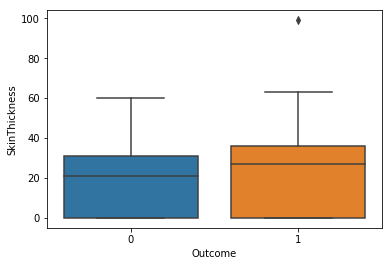

In [12]:
sns.boxplot(x='Outcome',y='SkinThickness',  data=pima)

People who were diagonised with Diabetes had more Skin Thickness.

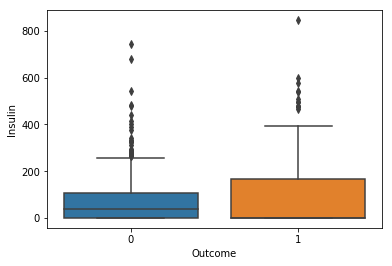

In [13]:
sns.boxplot(x='Outcome',y='Insulin',  data=pima)

People who were diagonised with Diabetes had lower insulin levels.

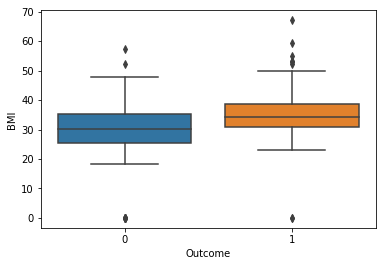

In [14]:
sns.boxplot(x='Outcome',y='BMI',  data=pima)

People who were diagonised with diabetes had higher BMI.

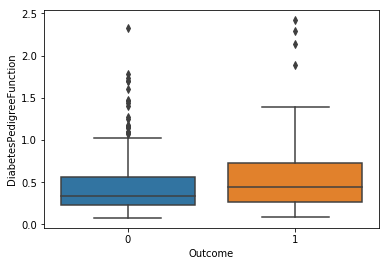

In [18]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',  data=pima)

People diagonised with Diabetes had higher Diabetes Pedigree Function.

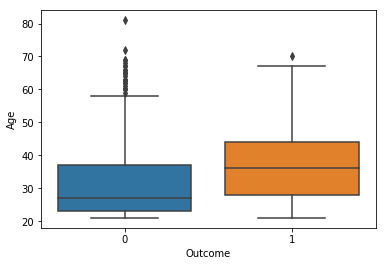

In [15]:
sns.boxplot(x='Outcome',y='Age',  data=pima)

Older women are more prone to Diabetes.

** Building the model **

In [20]:
# define features and label
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima.Outcome

In [21]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

### 3. Evaluation Metrics  <a id='metrics'>

** 3.1 Accuracy **  <a id='acc'>

In [10]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [11]:
# examine the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [12]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

** 3.2 Confusion Matrix **  <a id='conf'>

In [13]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


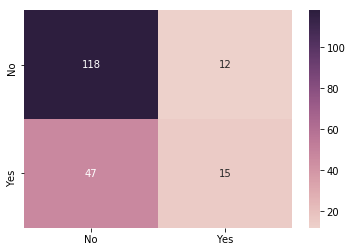

In [14]:
# Visualizing the confusion matrix

cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [15]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**3.3 Recall **  <a id='recall'>

In [16]:
recall=metrics.recall_score(y_test, y_pred_class)

# Formula to calculate Recall
print(TP / float(TP + FN))
print("Recall:",recall)

0.24193548387096775
Recall: 0.24193548387096775


** 3.4 Specificity **  <a id='specificity'>

In [17]:
specificity = TN / float(TN + FP)

print("Specificity:",specificity)

Specificity: 0.9076923076923077


** 3.5 Precision **  <a id='precision'>

In [18]:
precision=metrics.precision_score(y_test, y_pred_class)

#Formula to calculate Precision
print(TP / float(TP + FP))
print("Precision:",precision)

0.5555555555555556
Precision: 0.5555555555555556


** 3.6 F1 Score **  <a id='f1'>

In [19]:
f1_score=metrics.f1_score(y_test, y_pred_class)
print("F1-score:",metrics.f1_score(y_test, y_pred_class))

F1-score: 0.3370786516853933


### 4. Logistic Regression with different threshold (Balanced) <a id='diff'>

In [24]:
"""
train a logistic regression model on the training set with a different threshold that balances imbalanced data
Here we have used an additional parameter class_weight='balanced'
This means that the output label is balanced values(number of positive and negetive outcome of diabetes is same).
""" 
logreg2 = LogisticRegression(class_weight='balanced')
logreg2.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = logreg2.predict(X_test)

** Confusion matrix **

In [25]:
conf1=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))
TP = conf1[1, 1]
TN = conf1[0, 0]
FP = conf1[0, 1]
FN = conf1[1, 0]

[[87 43]
 [26 36]]


** Recall **

In [22]:
recall1=metrics.recall_score(y_test, y_pred_class)
print("Recall:",recall1)

Recall: 0.5806451612903226


** Specificity **

In [23]:
specificity = TN / float(TN + FP)
print("Specificity:", specificity)

Specificity: 0.6692307692307692


** Precision **

In [24]:
precision1=metrics.precision_score(y_test, y_pred_class)
print("Precision:",precision1)

Precision: 0.45569620253164556


**F1 score **

In [25]:
f1_score=metrics.f1_score(y_test, y_pred_class)
print("F1-score:",metrics.f1_score(y_test, y_pred_class))

F1-score: 0.5106382978723404


### 5. ROC curve  <a id='roc'>

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.It tells how good a model can distinguish between two classes.

The curve is created by plotting the **true positive rate** against **false positive rate**.<br>
**True Positive Rate(TPR) ** is same as **recall or sensitivity**.  <br>
**False Positive Rate** is known as probability of false alarm. This is calculated as (1 - Specificity) <br>


** ROC Curve of balanced Logistic Regression Model **

In [26]:
predict_probabilities = logreg2.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

# Lets look at all the thresholds
print(thresholds)

[1.88528136 0.88528136 0.81269355 0.80007631 0.76599856 0.75799477
 0.75041477 0.68232278 0.66580539 0.66232317 0.65992975 0.64007516
 0.63344066 0.63094226 0.62686858 0.61999031 0.6165715  0.61495391
 0.60885564 0.60572613 0.59956441 0.5980788  0.59747416 0.59692934
 0.5811603  0.57654977 0.57559573 0.57027609 0.56965974 0.56867124
 0.56390583 0.5622752  0.56019964 0.54650541 0.53166477 0.53023865
 0.52868836 0.51543944 0.51454107 0.51336243 0.51201716 0.506766
 0.50655084 0.50401529 0.48780664 0.48277855 0.47869797 0.47571675
 0.46663042 0.4333976  0.42880959 0.42141467 0.41957829 0.41886479
 0.4093072  0.39624437 0.3954592  0.39497208 0.39204553 0.39022936
 0.3889343  0.36448441 0.35948981 0.35615644 0.35234543 0.34087083
 0.33486592 0.33108322 0.32842307 0.31764981 0.3129836  0.28020009
 0.27672781 0.23493632 0.23428678 0.1452113  0.07905453 0.03254505]


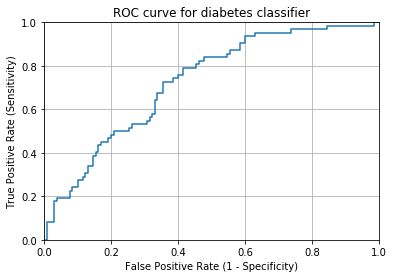

In [27]:
# Plotting the ROC Curve

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 6. AUC : Area Under Curve  <a id='auc'>
This is defined as the area under ROC curve. AUC is interpreted as the probability that it will rank a random positive example more highly than a random negative example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

** AUC of balanced Logistic Regression Model **

In [28]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve for balanced logistic regression : %f" % roc_auc)

Area under the ROC curve for balanced logistic regression : 0.724442


### 7. Lets compare this result with AUC of Unbalanced logistic regression 

In [29]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

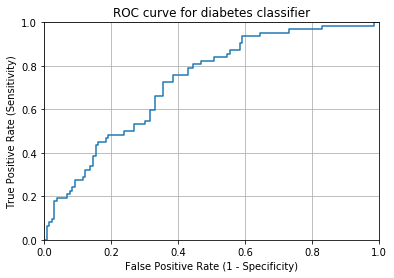

In [30]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [31]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve for unbalanced logistic regression : %f" % roc_auc)

Area under the ROC curve for unbalanced logistic regression : 0.724566


** We observed that both the logistic regression models have almost same AUC. Their performance is nearly the same. **  <br>

The unbalanced Logistic Regression performs slightly better than balanced Logistic Regression.

Thus, we can use AOC to see which model performs better classification.

### The End